<a href="https://colab.research.google.com/github/MizanMustakim/data_mining_project/blob/main/Data_mining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
!wget --no-check-certificate \
  https://gtd.terrorismdata.com/app/uploads/_mediavault/2021/02/globalterrorismdb_0221dist.xlsx

--2021-11-30 06:06:07--  https://gtd.terrorismdata.com/app/uploads/_mediavault/2021/02/globalterrorismdb_0221dist.xlsx
Resolving gtd.terrorismdata.com (gtd.terrorismdata.com)... 18.169.202.182
Connecting to gtd.terrorismdata.com (gtd.terrorismdata.com)|18.169.202.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99732895 (95M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘globalterrorismdb_0221dist.xlsx.1’

globalterrorismdb_0 100%[===================>]  95.11M  11.5MB/s    in 10s     

2021-11-30 06:06:19 (9.15 MB/s) - ‘globalterrorismdb_0221dist.xlsx.1’ saved [99732895/99732895]



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_1 = pd.read_excel("/content/globalterrorismdb_0221dist.xlsx")
df_1.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
print(df_1.shape)

(201183, 135)


In [ ]:
print(df_1.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [ ]:
col_list = ["iyear", "country_txt", "region", "region_txt", "provstate", "attacktype1_txt","success","suicide","weaptype1_txt","targtype1_txt","nkill"]
df_2 = df_1[col_list]

In [ ]:
df_2.head()

,iyear,country_txt,region,region_txt,provstate,attacktype1_txt,success,suicide,weaptype1_txt,targtype1_txt,nkill
0,1970,Dominican Republic,2,Central America & Caribbean,National,Assassination,1,0,Unknown,Private Citizens & Property,1.0
1,1970,Mexico,1,North America,Federal,Hostage Taking (Kidnapping),1,0,Unknown,Government (Diplomatic),0.0
2,1970,Philippines,5,Southeast Asia,Tarlac,Assassination,1,0,Unknown,Journalists & Media,1.0
3,1970,Greece,8,Western Europe,Attica,Bombing/Explosion,1,0,Explosives,Government (Diplomatic),NaN
4,1970,Japan,4,East Asia,Fukouka,Facility/Infrastructure Attack,1,0,Incendiary,Government (Diplomatic),NaN


In [ ]:
df_2 = df_2.fillna(0)
df_2.head()

,iyear,country_txt,region,region_txt,provstate,attacktype1_txt,success,suicide,weaptype1_txt,targtype1_txt,nkill
0,1970,Dominican Republic,2,Central America & Caribbean,National,Assassination,1,0,Unknown,Private Citizens & Property,1.0
1,1970,Mexico,1,North America,Federal,Hostage Taking (Kidnapping),1,0,Unknown,Government (Diplomatic),0.0
2,1970,Philippines,5,Southeast Asia,Tarlac,Assassination,1,0,Unknown,Journalists & Media,1.0
3,1970,Greece,8,Western Europe,Attica,Bombing/Explosion,1,0,Explosives,Government (Diplomatic),0.0
4,1970,Japan,4,East Asia,Fukouka,Facility/Infrastructure Attack,1,0,Incendiary,Government (Diplomatic),0.0


In [ ]:
df_2.dtypes

iyear                int64
country_txt         object
region               int64
region_txt          object
provstate           object
attacktype1_txt     object
success              int64
suicide              int64
weaptype1_txt       object
targtype1_txt       object
nkill              float64
dtype: object

**Total number of killing on the different regions**

In [ ]:
a = df_2.groupby(["region_txt","region", "country_txt", "iyear"])["nkill"].sum().reset_index()
a#.first().head(50)

,region_txt,region,country_txt,iyear,nkill
0,Australasia & Oceania,12,Australia,1970,0.0
1,Australasia & Oceania,12,Australia,1971,0.0
2,Australasia & Oceania,12,Australia,1972,1.0
3,Australasia & Oceania,12,Australia,1974,0.0
4,Australasia & Oceania,12,Australia,1978,2.0
...,...,...,...,...,...
3965,Western Europe,8,West Germany (FRG),1986,9.0
3966,Western Europe,8,West Germany (FRG),1987,2.0
3967,Western Europe,8,West Germany (FRG),1988,1.0
3968,Western Europe,8,West Germany (FRG),1989,5.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
a.region_txt.unique()

array(['Australasia & Oceania', 'Central America & Caribbean',
       'Central Asia', 'East Asia', 'Eastern Europe',
       'Middle East & North Africa', 'North America', 'South America',
       'South Asia', 'Southeast Asia', 'Sub-Saharan Africa',
       'Western Europe'], dtype=object)

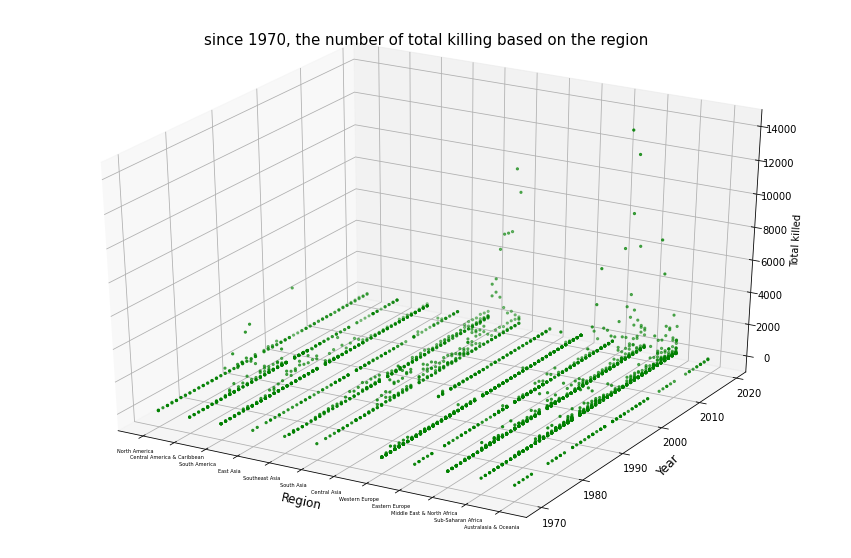

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")

plt.rcParams["figure.autolayout"] = True

ax.scatter(a.region, a.iyear, a.nkill, marker=".", c="green")

ax.set_xticks(a.region.unique())
ax.set_xticklabels(a.region_txt.unique(), fontsize=5)

# ax.set_zticklabels([1, "2K", "4K", "6K", "8K", "10K", "12K", "14K"])

ax.set_title("since 1970, the number of total killing based on the region", fontsize=15)

ax.set_xlabel("Region", fontsize=12)

ax.set_ylabel("Year", fontsize=12, rotation= 45)

ax.set_zlabel("Total killed", fontsize=10)

# ax.grid(False)

plt.show()

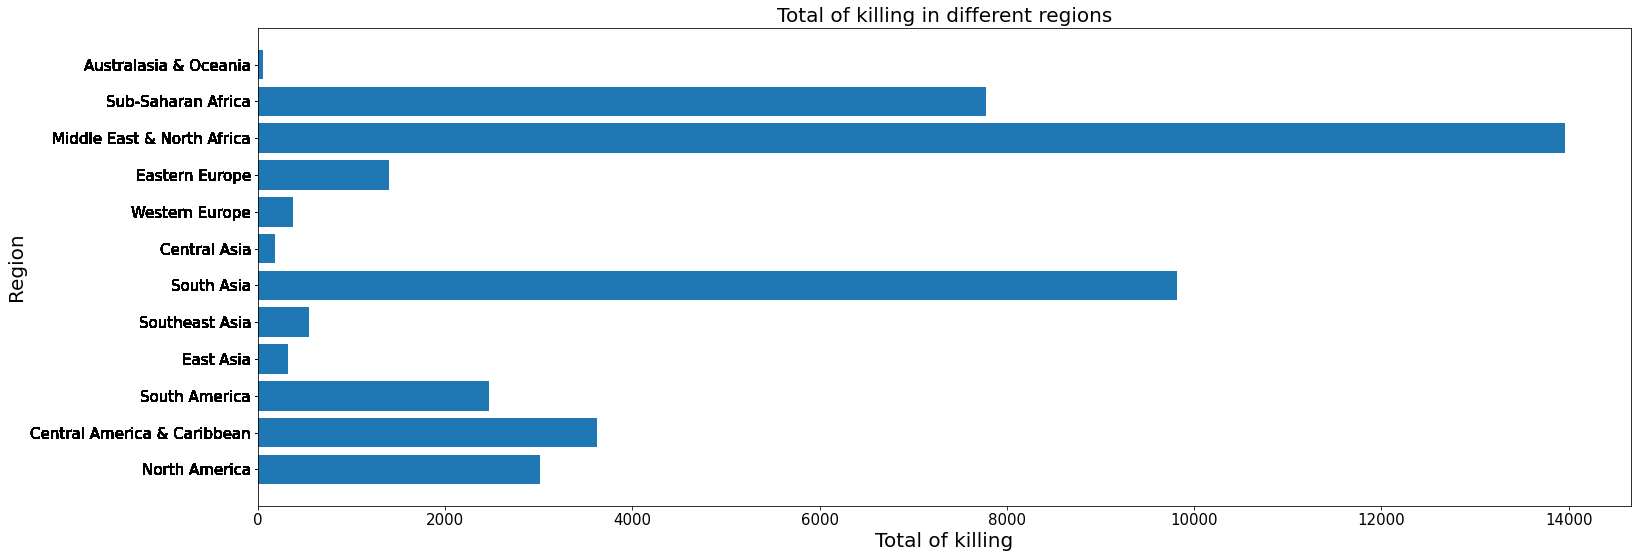

In [ ]:
fig = plt.figure(figsize=(23,8))
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20, titlesize=20)
# plt.xlim( right=max(a.nkill)+1000)
plt.barh(a.region,a.nkill)
plt.yticks(a.region, a.region_txt)
plt.title("Total of killing in different regions")
plt.xlabel("Total of killing")
plt.ylabel("Region")
plt.show()

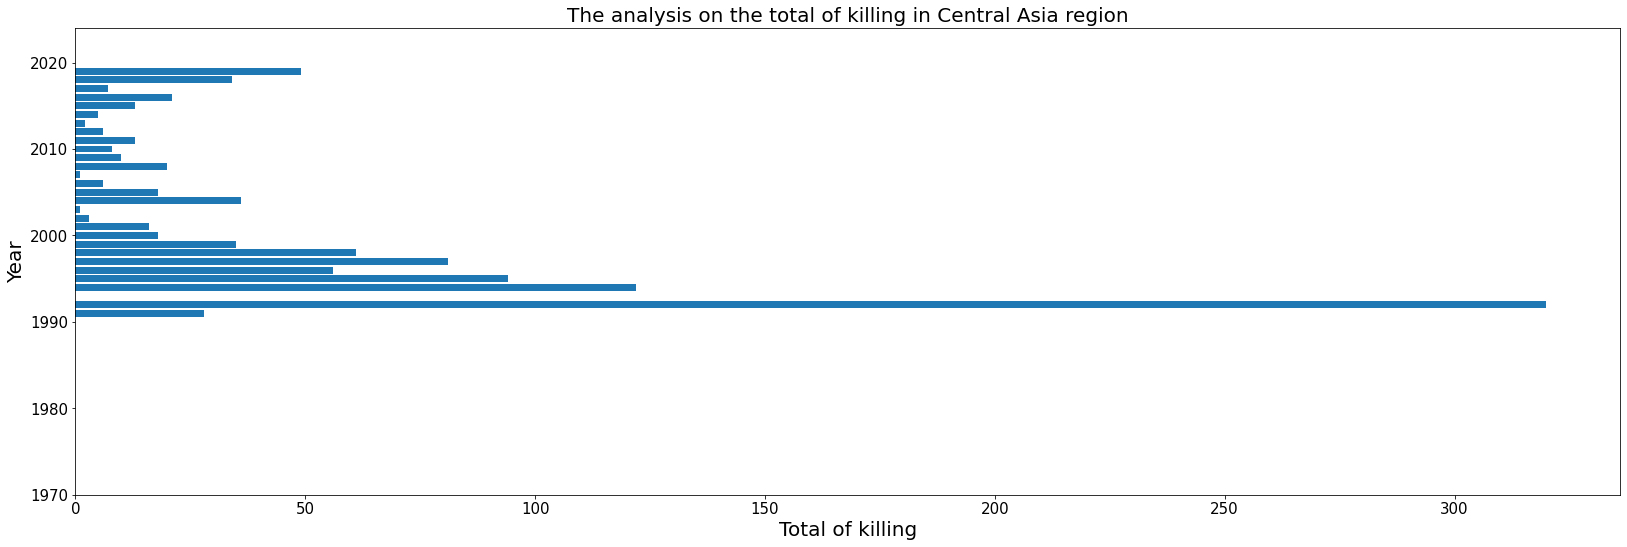

In [ ]:
region = "Central Asia" #@param ['Australasia & Oceania', 'Central America & Caribbean','Central Asia', 'East Asia', 'Eastern Europe','Middle East & North Africa', 'North America', 'South America','South Asia', 'Southeast Asia', 'Sub-Saharan Africa','Western Europe']

fig = plt.figure(figsize=(23,8))

b = a[a["region_txt"] == region]
b = b.groupby("iyear")["nkill"].sum().reset_index()
plt.barh(b.iyear, b.nkill)
plt.ylim(a.iyear.min(), a.iyear.max()+5)
# plt.yticks(b.iyear, list(a.iyear.unique()))
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.title("The analysis on the total of killing in {} region".format(region))
plt.xlabel("Total of killing")
plt.ylabel("Year")
plt.show()

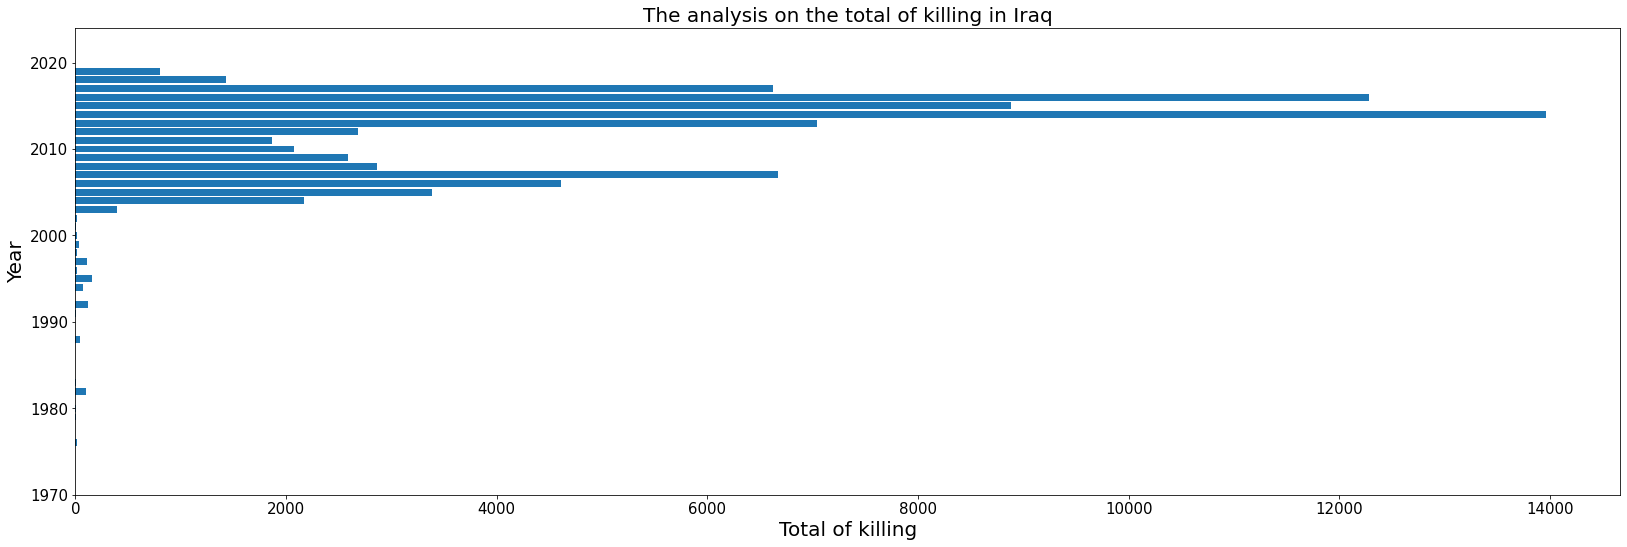

In [ ]:
country = 'Iraq' #@param ['Australia', 'Fiji', 'French Polynesia', 'New Caledonia','New Hebrides', 'New Zealand', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu', 'Wallis and Futuna', 'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guadeloupe', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Martinique', 'Nicaragua', 'Panama', 'St. Kitts and Nevis', 'St. Lucia', 'Trinidad and Tobago', 'Armenia', 'Azerbaijan', 'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan', 'China', 'Hong Kong', 'Japan', 'Macau', 'North Korea', 'South Korea', 'Taiwan', 'Albania', 'Belarus', 'Bosnia-Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Czechoslovakia', 'East Germany (GDR)', 'Estonia', 'Hungary', 'Kosovo', 'Latvia', 'Lithuania', 'Macedonia', 'Moldova', 'Montenegro', 'Poland', 'Romania', 'Russia', 'Serbia', 'Serbia-Montenegro', 'Slovak Republic', 'Slovenia', 'Soviet Union', 'Ukraine', 'Yugoslavia', 'Algeria', 'Bahrain', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Morocco', 'North Yemen', 'Qatar', 'Saudi Arabia', 'South Yemen', 'Syria', 'Tunisia', 'Turkey', 'United Arab Emirates', 'West Bank and Gaza Strip', 'Western Sahara', 'Yemen', 'Canada', 'Mexico', 'United States', 'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Falkland Islands', 'French Guiana', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela', 'Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Mauritius', 'Nepal', 'Pakistan', 'Sri Lanka', 'Brunei', 'Cambodia', 'East Timor', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'South Vietnam', 'Thailand', 'Vietnam', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Peoples Republic of the Congo', 'Republic of the Congo', 'Rhodesia', 'Rwanda', 'Senegal', 'Seychelles', 'Sierra Leone','Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland','Tanzania', 'Togo', 'Uganda', 'Zaire', 'Zambia', 'Zimbabwe','Andorra', 'Austria', 'Belgium', 'Cyprus', 'Denmark', 'Finland','France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy','Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Portugal','Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'Vatican City','West Germany (FRG)']
fig = plt.figure(figsize=(23,8))

b = a[a["country_txt"] == country]
b = b.groupby("iyear")["nkill"].sum().reset_index()
plt.barh(b.iyear, b.nkill)
plt.ylim(a.iyear.min(), a.iyear.max()+5)
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.title("The analysis on the total of killing in {}".format(country))
plt.xlabel("Total of killing")
plt.ylabel("Year")
plt.show()